# Project: Traffic Sign Recognition Classifier

**The goals / steps of this project are the following:**
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

**Key strategies experimented include:**
* Experiment with the LeNet layers to make LeNet_2
* Dropout regularization used to make sure the network doesn't overfit the training data
* Tune the hyperparameters, such as learning rate, etc.,
* Improve the data pre-processing with equalization and normalization
* Augment the training data by rotating, shifting, and scaling images.

---
## Step 0: Load The Data

In [366]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
!pwd

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

/Users/jinpark/Documents/Udacity/4.DNN/classifying-traffic-signs


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [367]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
import numpy as np

n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

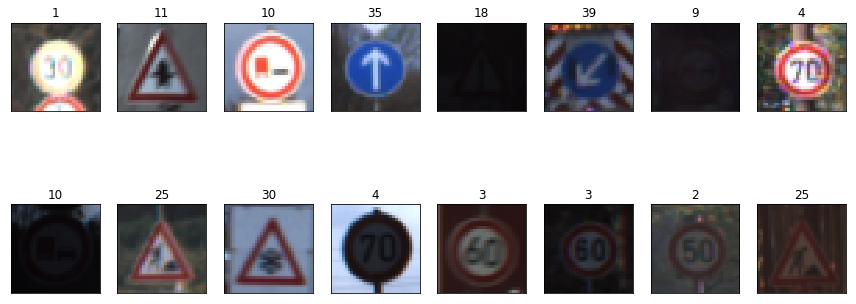

In [368]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
import random
import pandas as pd
%matplotlib inline

index = [random.randint(0,len(X_train)) for i in range(16)]
# print(index)
df = pd.read_csv('signnames.csv')
# print(df.loc[y_train[index]])

methods = [str(y_train[i]) for i in index]
fig, axs = plt.subplots(2,8,  figsize=(12,6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[index[i]])
    ax.set_title(methods[i])

plt.tight_layout()
plt.show()

**[Observation] Input images have many issues such as viewpoint variations, lighting conditions (saturations, low-contrast), motion-blur, occlusions, sun glare, physical damage, colors fading, graffiti, stickers and low resolution. Above all, different lighting conditions seem to be the biggest issue. Some samples are so dark that anyone can hardly recognize. This variation may also be a problem for machines to learn. So, i'm going to deal with this issue later at the pre-processing section.**

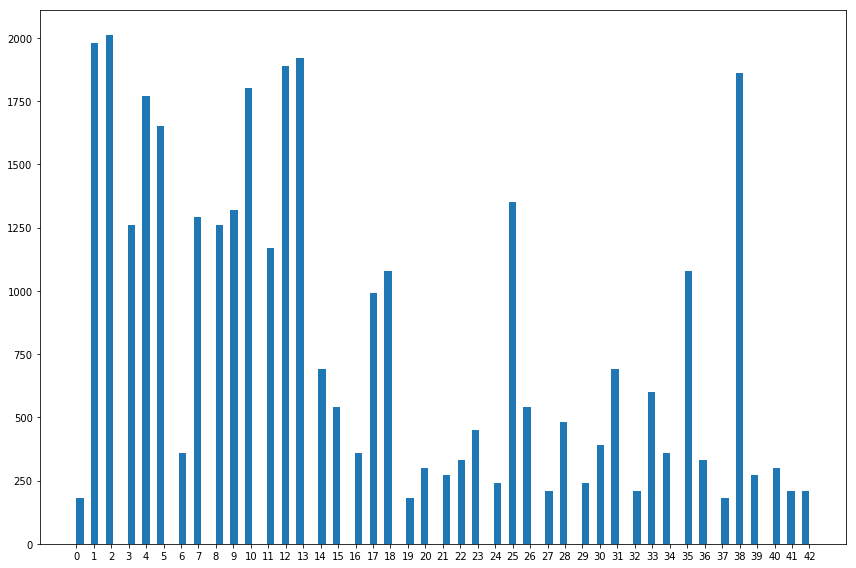

In [369]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(y_train,bins=100)
# plt.xticks(np.arange(0,43,1), np.array(df['SignName']), rotation='vertical')
plt.xticks(np.arange(0,43,1))
fig.tight_layout()
plt.show()

**[Observation] The histogram above shows that each class of dataset has very different number of samples. This could be a problem that lead to bias towards frequent signs. This bias is not necessarily bad if it is close to what actually happens in the real world. Here, checking the distribution of test data, y_test has almost similiar distribution with that of y_train.**

**But, labels such as 0, 19, 24, 27, 29, 32, 37, 41, and 42 are less than 250 samples. This lack of samples for some lables might contribute to the bias. We want the model to be perceivable enough for less frequent signs too, not overfitting. It may be reasonable to fill those cavities to prevent the bias. Especially, the number of samples of label 0, 19, 24, 27, 29, 32, 37, 41, and 42 are significanly small, which is less than 250. I'm dealing with it at the pre-processing later.**

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 1. Histogram Equalization

**To have better quality of images. i'm using [Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization) as the first pre-processing. Since the different lighting conditions among test samples are the primary issue as observed above, i'm trying to convert color space from RGB to [LAB](https://en.wikipedia.org/wiki/CIELAB_color_space) and equalize L channel, brightness, only.**

In [370]:
def histogram_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    lab_img[:,:,0]=clahe.apply(lab_img[:,:,0])
    return cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)

def hist_equal_data(X,y):    
    eqHist_X_train = np.zeros_like(X)
    eqHist_y = np.copy(y)
    
    for i, _ in enumerate(X):
        eqHist_X_train[i] = histogram_equalization(X[i])
    
    print("Transformed to equal hist data...")
        
    return eqHist_X_train, eqHist_y

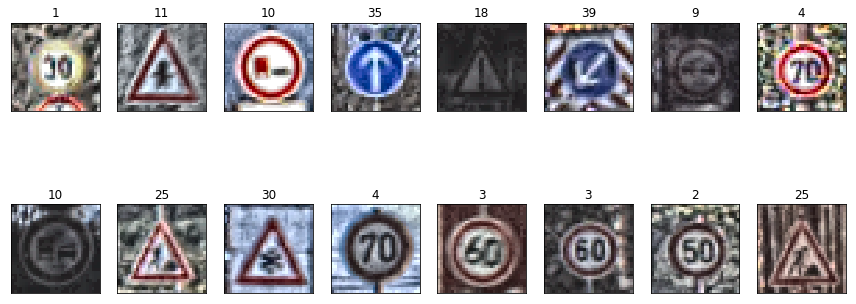

In [371]:
# index = [random.randint(0,len(X_train)) for i in range(16)]
# print(index)
import cv2

df = pd.read_csv('signnames.csv')
# print(df.loc[y_train[index]])

methods = [str(y_train[i]) for i in index]
fig, axs = plt.subplots(2,8,  figsize=(12,6), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    ax.imshow(histogram_equalization(X_train[index[i]]))
    ax.set_title(methods[i])

plt.tight_layout()
plt.show()

**It looks like histogram equalization do the job. Now, i'm adapting it to the whole dataset and save it for the next stage pre-processing**

In [372]:
eqHist_X_train, eqHist_y_train = hist_equal_data(X_train, y_train)
eqHist_X_valid, eqHist_y_valid = hist_equal_data(X_valid, y_valid)
eqHist_X_test, eqHist_y_test = hist_equal_data(X_test, y_test)

train_data = {
    'features': eqHist_X_train,
    'labels': eqHist_y_train
}
valid_data = {
    'features': eqHist_X_valid,
    'labels': eqHist_y_valid
}
test_data = {
    'features': eqHist_X_test,
    'labels': eqHist_y_test
}
with open('../data/eqHist_train.p', 'wb') as f:
    pickle.dump(train_data, f, pickle.HIGHEST_PROTOCOL)
with open('../data/eqHist_valid.p', 'wb') as f:
    pickle.dump(valid_data, f, pickle.HIGHEST_PROTOCOL)
with open('../data/eqHist_test.p', 'wb') as f:
    pickle.dump(test_data, f, pickle.HIGHEST_PROTOCOL)

Transformed to equal hist data...
Transformed to equal hist data...
Transformed to equal hist data...


### 2. Data Augmentation

**As mentioned above, training dataset needs to be augmented though. On the [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), it says "Samples are randomly perturbed in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees)". There's a nice Keras api to do this job, ImageDataGenerator. I'm keeping the translation, rotation, and scaling paramters as they are in the paper. And i'm adding 5 generated images for each training image. Let's check if it works as expected before applying it to the entire training dataset.**

**I'm complementing samples only for the label with less than 800 samples.**

In [375]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# Preprocessing for data augmentation
sample_size = np.bincount(y_train)
# sample_y = np.nonzero(sample_size)[0]
sample_dist = [i for i,j in zip(sample_y, sample_size) if j < 800]
print("Lables that are less than 800 samples are ...\n", sample_dist)
print()

first_idx=[]
tmp = -1
for i,label in enumerate(y_train):
    if label != tmp:
        first_idx.append([label,i])
        tmp = label

first_idx = sorted(first_idx, key= lambda x:x[0])
# print(first_idx)
for i,item in enumerate(first_idx):
    item.append(sample_size[i])
    
for i,j,k in first_idx:
    if i in sample_dist:
        print("label {} starts from index {} with size {}".format(i,j,k))

Lables that are less than 800 samples are ...
 [0, 6, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42]

label 0 starts from index 9960 with size 180
label 6 starts from index 21450 with size 360
label 14 starts from index 29219 with size 690
label 15 starts from index 29909 with size 540
label 16 starts from index 5010 with size 360
label 19 starts from index 6630 with size 180
label 20 starts from index 25950 with size 300
label 21 starts from index 25680 with size 270
label 22 starts from index 4500 with size 330
label 23 starts from index 1770 with size 450
label 24 starts from index 10800 with size 240
label 26 starts from index 1230 with size 540
label 27 starts from index 10350 with size 210
label 28 starts from index 26849 with size 480
label 29 starts from index 10560 with size 240
label 30 starts from index 25020 with size 390
label 31 starts from index 210 with size 690
label 32 starts from index 10140 with size 210
label 33 star

**I'm using ImageDataGenerator Keras API to obtain transformed and augmented images. Parameter settings for the transformation are translation(-.1~.1), rotation((-15,15) degree), scaling(0.3), and shear(0.5).**

In [376]:
def augment_image(images,size):
    datagen = ImageDataGenerator(
        width_shift_range= 0.1, # NOTE unary parameter setting format!
        height_shift_range= 0.1, 
        rotation_range=15,
        shear_range= 0.2,
        zoom_range=0.3,
        fill_mode ='nearest')
    
#     samaples = expand_dims(image, 0)
#     it = datagen.flow(samples, batch_size=1)
    it = datagen.flow(images, batch_size=size)
    images_after = it.next()
    images_after = images_after.astype('uint8')

    return images_after

def display_augmented_images(image):  
    for i in range(5):
        pyplot.subplot(150 + 1 + i)
        pyplot.imshow(augment_image(image))
    pyplot.show()

def augment_data(X,y):
    aug_X_train = np.copy(X)
    aug_y_train = np.copy(y)
    
    for label, start, size in first_idx:
        acc_size = size
        while acc_size < 800:
            #print("augmenting {} {} {}".format(label,start,size))
            aug_X = np.copy(augment_image(X[start:start+size], size))
            aug_y = np.copy(y[start:start+size])
            
            aug_X_train = np.vstack((aug_X_train, aug_X))
            aug_y_train = np.hstack((aug_y_train, aug_y))
            
            acc_size += size
            
        if acc_size != size:
            print("label {} now amounts to {} samples ...".format(label, acc_size))
    
    return aug_X_train, aug_y_train

# display_augmented_images(eqHist_X_train[5012])   

**I'm augmenting the samples to make sure we have more than 800 samples for any label. The number of training samples are now 51448.**

In [377]:
aug_X_train, aug_y_train = augment_data(eqHist_X_train, eqHist_y_train)
print(aug_X_train.shape, aug_y_train.shape)

data = {
    'features': aug_X_train,
    'labels': aug_y_train
}
# save
with open('../data/aug_train.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

label 0 now amounts to 900 samples ...
label 6 now amounts to 1080 samples ...
label 14 now amounts to 1380 samples ...
label 15 now amounts to 1080 samples ...
label 16 now amounts to 1080 samples ...
label 19 now amounts to 900 samples ...
label 20 now amounts to 900 samples ...
label 21 now amounts to 810 samples ...
label 22 now amounts to 990 samples ...
label 23 now amounts to 900 samples ...
label 24 now amounts to 960 samples ...
label 26 now amounts to 1080 samples ...
label 27 now amounts to 840 samples ...
label 28 now amounts to 960 samples ...
label 29 now amounts to 960 samples ...
label 30 now amounts to 1170 samples ...
label 31 now amounts to 1380 samples ...
label 32 now amounts to 840 samples ...
label 33 now amounts to 1198 samples ...
label 34 now amounts to 1080 samples ...
label 36 now amounts to 990 samples ...
label 37 now amounts to 900 samples ...
label 39 now amounts to 810 samples ...
label 40 now amounts to 900 samples ...
label 41 now amounts to 840 sampl

### 3. Normalization

**Here, finally, the next step is normalization using  `(pixel - 128)/ 128`.**

In [378]:
import cv2

train_file = '../data/aug_train.p'
# train_file = '../data/eqHist_train.p'

validate_file = '../data/eqHist_valid.p'
test_file = '../data/eqHist_test.p'
with open(train_file, mode='rb') as f:
    train = pickle.load(f)
with open(validate_file, mode='rb') as f:
    valid = pickle.load(f)
with open(test_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

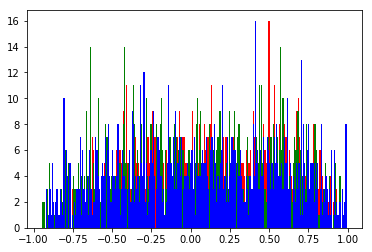

In [379]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Pixel Normalization: scale pixel values to the range 0-1.
# Pixel Centering: scale pixel values to have a zero mean.
# Pixel Standardization: scale pixel values to have a zero mean and unit variance.
X_train = (X_train - 128.)/128
X_valid = (X_valid - 128.)/128
X_test = (X_test - 128.)/128

img = X_train[5012]
color = ('r','g','b')
for i, col in enumerate(color):
    plt.hist(img[:,:,i].ravel(),256, color=col)
plt.show()
# hist = cv2.equalizeHist(img[:,:,0])

### 4. Shuffling

In [380]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

**I used Lenet5 architecture as guided. As Lenet5 architecture was designed for a grayscale image as input. Now that the input is color images, network should be modified somehow to embrace the enlarged dimesion of images. 
Here, LeNet_2 is slightly modified version of LeNet to embrace the color images and capture more low-level features. I simply made feature-maps go deeper such that conv1 output is changed from 28x28x6 to 28x28x12, conv2 from 10x10x16 to 10x10x28, and flatten output from 400 to 700.**

In [381]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    Wc1 = tf.Variable(tf.truncated_normal([5,5,3,12], mean=mu, stddev=sigma))
    bc1 = tf.Variable(tf.zeros(12))
    conv1 = tf.nn.conv2d(x, Wc1, strides=[1,1,1,1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bc1)
    
    #conv1 = tf.nn.dropout(conv1, 0.5)
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
 
    
    # TODO: Layer 2: Convolutional. Output = 10x10x28.
    Wc2 = tf.Variable(tf.truncated_normal([5,5,12,28],mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.zeros(28))
    conv2 = tf.nn.conv2d(conv1, Wc2, strides=[1,1,1,1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, bc2)
    
    #conv2 = tf.nn.dropout(conv2, 0.5)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x28. Output = 5x5x28.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

        
    # TODO: Flatten. Input = 5x5x28. Output = 700.
    fc1 = tf.contrib.layers.flatten(conv2)
    
    
    # TODO: Layer 3: Fully Connected. Input = 700. Output = 300.
    Wf1 = tf.Variable(tf.truncated_normal([700, 300],mean=mu, stddev=sigma))
    bf1 = tf.Variable(tf.zeros([300]))

    fc1 = tf.add(tf.matmul(fc1, Wf1), bf1)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)

    # TODO: Layer 4: Fully Connected. Input = 300. Output = 120.
    Wf2 = tf.Variable(tf.truncated_normal([300, 120],mean=mu, stddev=sigma))
    bf2 = tf.Variable(tf.zeros(120))

    fc2 = tf.add(tf.matmul(fc1, Wf2), bf2)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.7)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 43.
    Wf3 = tf.Variable(tf.truncated_normal([120, 43],mean=mu, stddev=sigma))
    bf3 = tf.Variable(tf.zeros(43))
    
    logits = tf.add(tf.matmul(fc2, Wf3), bf3)
    
    return logits

 ### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [382]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is sele cted, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits = LeNet_2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [383]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [384]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './saved_model/lenet_2')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.691

EPOCH 2 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.858

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.904

EPOCH 6 ...
Validation Accuracy = 0.908

EPOCH 7 ...
Validation Accuracy = 0.925

EPOCH 8 ...
Validation Accuracy = 0.927

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.938

EPOCH 11 ...
Validation Accuracy = 0.940

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.948

EPOCH 17 ...
Validation Accuracy = 0.947

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.950

EPOCH 20 ...
Validation Accuracy = 0.955

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.952

EPOCH 23 ...
Validation Accuracy = 0.953

EPOCH 24 ...
Validation Accura

In [385]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./saved_model'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./saved_model/lenet_2
Test Accuracy = 0.955


### *Test Accuracy is 95% !*

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

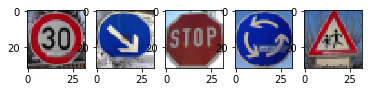

GROUND TRUTH: [ 1 38 14 40 28]


In [386]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

path = "five_test_signs/"
test_images_name = [str(path+f) for f in os.listdir(path) if not f.startswith(".")]
test_images = []

for i, name in enumerate(test_images_name):
    image = mpimg.imread(name)
    rs_image = cv2.resize(image, dsize=(32, 32), interpolation=cv2.INTER_AREA)
    test_images.append(rs_image)
    pyplot.subplot(150 + 1 + i)
    pyplot.imshow(rs_image)  

plt.show()

test_images = np.array(test_images)
ground_truth = np.array([1,38,14,40,28])
print("GROUND TRUTH:",ground_truth)

### Predict the Sign Type for Each Image

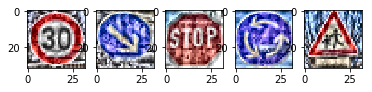

INFO:tensorflow:Restoring parameters from ./saved_model/lenet_2
Predictions are  [ 1 38 14 40 28] !!



In [387]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

test_inputs = np.array([histogram_equalization(img) for img in test_images])

for i,item in enumerate(test_inputs):
    pyplot.subplot(150 + 1 + i)
    pyplot.imshow(histogram_equalization(item))

pyplot.show()

test_inputs = (test_inputs - 128.)/128

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./saved_model'))
    out_logit = sess.run(logits, feed_dict={x: test_inputs})
    output = np.argmax(out_logit,1)
    print("Predictions are ",output, "!!\n")

### Analyze Performance

In [388]:
df = pd.read_csv('signnames.csv')
print(df.loc[output])

    ClassId              SignName
1         1  Speed limit (30km/h)
38       38            Keep right
14       14                  Stop
40       40  Roundabout mandatory
28       28     Children crossing


### *For new images, the model has 100% accuracy !*

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [389]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    scores = sess.run(tf.nn.top_k(tf.nn.softmax(out_logit), k=5, sorted=True))
    
for i in range(len(scores[0])):
    print('Input image {} is class {}'.format(i, np.argmax(out_logit[i])))
print()
# np.set_printoptions(precision=4)
for i in range(len(scores[0])):
    print('Top5 score is {}, label {}'.format(np.float16(scores[0][i]), scores[1][i]))

Input image 0 is class 1
Input image 1 is class 38
Input image 2 is class 14
Input image 3 is class 40
Input image 4 is class 28

Top5 score is [1. 0. 0. 0. 0.], label [ 1 18  2 27 12]
Top5 score is [1. 0. 0. 0. 0.], label [38 34 40  5 36]
Top5 score is [1.00e+00 1.85e-06 0.00e+00 0.00e+00 0.00e+00], label [14 29 24  0 17]
Top5 score is [1.0e+00 8.3e-07 0.0e+00 0.0e+00 0.0e+00], label [40 38  7  5 10]
Top5 score is [1.000e+00 3.415e-05 0.000e+00 0.000e+00 0.000e+00], label [28 29 24 25 23]


**For all 5 images, the highest score of each label has a very large margin over the 2nd highest. The model has  Let's check Top 5 scores lables 28(Children crossing) for the last image.**

28 26849, 29 10560, 24 10800, 25 33449, 23 1770, 

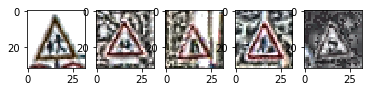

    ClassId                   SignName
28       28          Children crossing
29       29          Bicycles crossing
24       24  Road narrows on the right
25       25                  Road work
23       23              Slippery road


In [391]:
training_file = '../data/eqHist_train.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_check, y_check = train['features'], train['labels']


for i,targ_item in enumerate(scores[1][4]):
    idx = np.where(y_check==targ_item)
    print(targ_item, idx[0][0], end=", ")
    pyplot.subplot(150 + 1 + i)
    pyplot.imshow(histogram_equalization(X_check[idx[0][4]]))

pyplot.show()
print(df.loc[scores[1][4]])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
